# Average Entanglement Entropy in the QFT

In [24]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.extensions import UnitaryGate
from qiskit.providers.aer.library import SaveDensityMatrix
from qiskit.visualization import array_to_latex
from qiskit.quantum_info.operators import Operator
from qiskit import execute, transpile, assemble
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
from qiskit import Aer
from sympy import factorint
from numpy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy import pi
from sympy import *
import random
from random import sample
import pandas as pd
import math


from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer import AerSimulator
from qiskit import Aer
from numpy import pi
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
print("Import Successfully")

Import Successfully


In [25]:
def qft_dagger(n, qubits):
    qc = QuantumCircuit(n)

    size = len(qubits)
    label = 0
    qc.append(SaveDensityMatrix(size, label = f'pho_%.1f' % (label)), [i for i in qubits])

    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
        label += 1
        qc.append(SaveDensityMatrix(size, label = f'pho_%.1f' % (label)), [i for i in qubits])
        #qc.barrier(n - 1)
        
    for j in range(n):
        for m in range(j):
            label += 1
            qc.cp(-np.pi/float(2**(j-m)), m, j)
            qc.append(SaveDensityMatrix(size, label = f'pho_%.1f' % (label)), [i for i in qubits])
        qc.h(j)
        label +=1
        qc.append(SaveDensityMatrix(size, label = f'pho_%.1f' % (label)), [i for i in qubits])
    return qc

In [31]:

n = 4
data =[]

tmp = 0
for i in range(2*n - 2 + 1 ):
    tmp = tmp + 2*n - i

rho_step = int(n/2 + tmp + 1)                #number of rhos to consider +1!
somma = np.zeros(rho_step)

for l in range(2*n): 

    #partition = random.randint(2, n)
    qubit = [l] #random.sample(range(0, n), partition)
    qc=qft_dagger(2*n, qubit)
    qc = qc.inverse()
    qc.measure_all()
    
    aer_sim = Aer.get_backend('aer_simulator')
    t_qc = transpile(qc, aer_sim)
    qobj = assemble(t_qc)                                
    results = aer_sim.run(qobj, shots = 1).result()
    counts = results.get_counts()

    labels = []
    for i in range(len(counts)):
        labels.append(int(list(counts.keys())[i], 2))

    negativities = []
    for i in reversed(range(rho_step)):
        density_matrix = results.data()['pho_%.1f' % (i)]
        density_matrix_op = density_matrix.to_operator()
        density_matrix_tr = density_matrix_op.transpose()
        negativities.append( (linalg.norm(density_matrix_tr, 1) - 1)/2 )
    
    data.append(negativities)
    #print(j, negativities)
    #for i in range(len(negativities)):
    #    somma[i] = somma[i] + negativities[i]
    
    qc_prova = qc
    negativities = 0
    qc = 0
    counts = 0
    results = 0
    density_matrix = 0
    t_qc = 0
    qobj = 0
     
j += 1

#media = np.zeros(rho_step)
#for i in range(rho_step):
#    media[i] =  somma[i]/ runs

In [32]:
qc_prova.draw(fold =- 1)

┌───┐                                                                                                                                                                                           ░ ┌─┐                     
   q_0: ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■──────────────────────────────■─────────────────────────────■───────────────────■───────────────────■───────────────────■─────────■──────────┤ H ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────X───────────░─┤M├─────────────────────
                                                                                                                                                                                                                         │                              │                             │                   │                   │          ┌───┐    │         │P(π/2)    └───┘                                                                                                                                                                               │           ░ └╥┘┌─┐                  
   q_1: ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■────────────────────────■──────────────────┼──────────■───────────────────┼─────────■───────────────────┼─────────■─────────┼─────────■─────────┼──────────┤ H ├────┼─────────■────────────X─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼───────────░──╫─┤M├──────────────────
                                                                                                                                                                             │                        │                  │          │                   │         │          ┌───┐    │         │         │         │P(π/2)   │          └───┘    │P(π/4)                │                                                                                                                                                                                 │           ░  ║ └╥┘┌─┐               
   q_2: ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■───────────────────■──────────────────┼─────────■──────────────┼─────────■────────┼──────────┼─────────■─────────┼─────────┼──────────┤ H ├────┼─────────┼─────────┼─────────■─────────┼───────────────────■────────────X─────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼───────────░──╫──╫─┤M├───────────────
                                                                                                                                      │                   │                  │         │        ┌───┐ │         │        │          │         │P(π/2)   │         │          └───┘    │         │P(π/4)   │                   │P(π/8)                          │         │                                                                                                                                                                                 │           ░  ║  ║ └╥┘┌─┐            
   q_3: ────────────────────────────────────────────────────────────────────────────────────────────■───────────────────■─────────────┼─────────■─────────┼─────────■────────┼─────────┼────────┤ H ├─┼─────────┼────────┼──────────┼─────────■─────────┼─────────┼───────────────────┼─────────■─────────┼──────────────

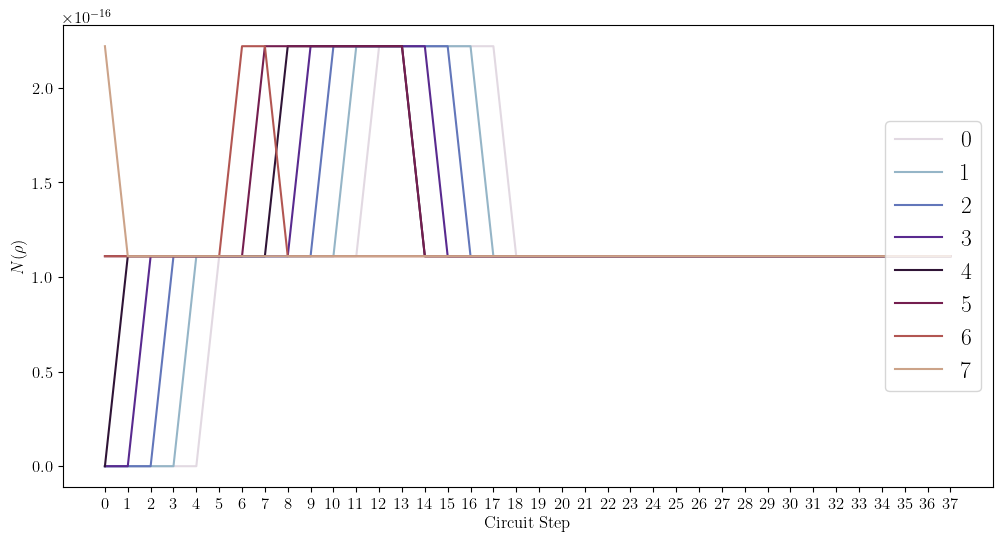

In [59]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap('twilight')

plt.rc('figure', figsize=(12, 6))
params = {'text.usetex' : True, 'font.size' : 12, 'font.family' : 'serif'}
plt.rcParams.update(params)

xs = []
for i in range(len(data[0])):
    xs.append(i)
 
plt.xticks(xs)
plt.xlabel('Circuit Step')
plt.ylabel(r"$N(\rho)$")
for i in range(2*n):
    color = cmap(i/(2*n))
    plt.plot(data[i], label=f'{i}', color = color)
plt.legend(fontsize = 17, loc = 'right')
plt.savefig('qft_ent_partitionsSINGLE.pdf', format = 'pdf')
